In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from matplotlib.pyplot import figure
import keras;
import tensorflow as tf;
from keras.preprocessing.sequence import TimeseriesGenerator;
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.metrics import r2_score

df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')#, index_col = 'Date')
df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AAPL.csv')#, index_col = 'Date')
df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ABNB.csv')#, index_col = 'Date')
df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AMZN.csv')#, index_col = 'Date')
df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\BTC-USD.csv')#, index_col = 'Date')
df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\FDX.csv')#, index_col = 'Date')
df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\IBM.csv')#, index_col = 'Date')
df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\MSFT.csv')#, index_col = 'Date')
df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\NVDA.csv')#, index_col = 'Date')
df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ORCL.csv')#, index_col = 'Date')
df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\GOOG.csv')#, index_col = 'Date')

In [2]:
df_TSLA = df_TSLA.drop(labels=range(0, len(df_TSLA.index)-127), axis=0) #127
# df_AAPL = df_AAPL.drop(labels=range(0, len(df_AAPL.index)-50), axis=0)
# df_ABNB = df_ABNB.drop(labels=range(0, len(df_ABNB.index)-50), axis=0)
# df_AMZN = df_AMZN.drop(labels=range(0, len(df_AMZN.index)-50), axis=0)
# df_BTC = df_BTC.drop(labels=range(0, len(df_BTC.index)-50), axis=0)
# df_FDX = df_FDX.drop(labels=range(0, len(df_FDX.index)-50), axis=0)
# df_IBM = df_IBM.drop(labels=range(0, len(df_IBM.index)-50), axis=0)
# df_MSFT = df_MSFT.drop(labels=range(0, len(df_MSFT.index)-50), axis=0)
# df_NVDA = df_NVDA.drop(labels=range(0, len(df_NVDA.index)-50), axis=0)
# df_ORCL = df_ORCL.drop(labels=range(0, len(df_ORCL.index)-50), axis=0)
# df_GOOG = df_GOOG.drop(labels=range(0, len(df_GOOG.index)-50), axis=0)

In [3]:
df_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
2963,2022-04-06,357.823334,359.666656,342.566681,348.586670,348.586670,89348400
2964,2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200
2965,2022-04-08,347.736664,349.480011,340.813324,341.829987,341.829987,55013700
2966,2022-04-11,326.799988,336.156677,324.880005,325.309998,325.309998,59357100
2967,2022-04-12,332.546661,340.396667,325.533325,328.983337,328.983337,65976000
...,...,...,...,...,...,...,...
3085,2022-09-30,266.149994,275.570007,262.470001,265.250000,265.250000,67726600
3086,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
3087,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
3088,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700


In [4]:
df_TSLA = df_TSLA.drop(['Open','High','Low', 'Adj Close'], axis = 1);
df_TSLA

,Date,Close,Volume
2963,2022-04-06,348.586670,89348400
2964,2022-04-07,352.420013,79447200
2965,2022-04-08,341.829987,55013700
2966,2022-04-11,325.309998,59357100
2967,2022-04-12,328.983337,65976000
...,...,...,...
3085,2022-09-30,265.250000,67726600
3086,2022-10-03,242.399994,98363500
3087,2022-10-04,249.440002,109578500
3088,2022-10-05,240.809998,86982700


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


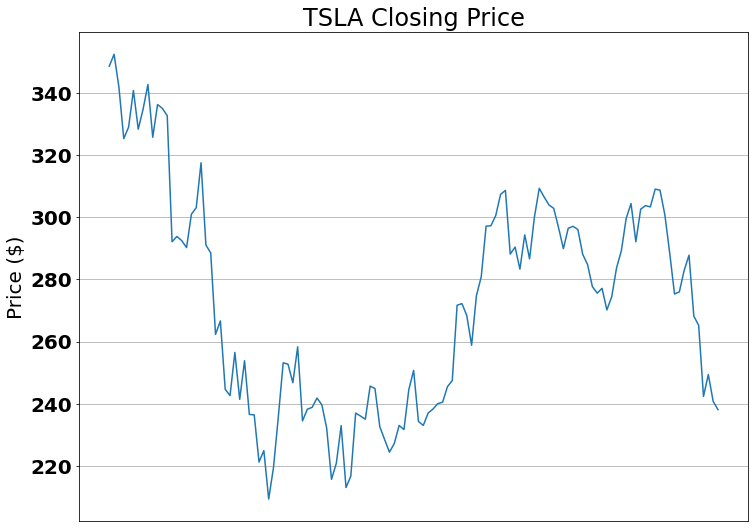

In [5]:
plt.figure(figsize = (12,9));
plt.figure(1);
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font);
plt.title("TSLA Closing Price");
plt.plot(df_TSLA['Date'],df_TSLA['Close']); plt.grid(); plt.ylabel('Price ($)');
frame1 = plt.gca();
frame1.axes.get_xaxis().set_visible(False)

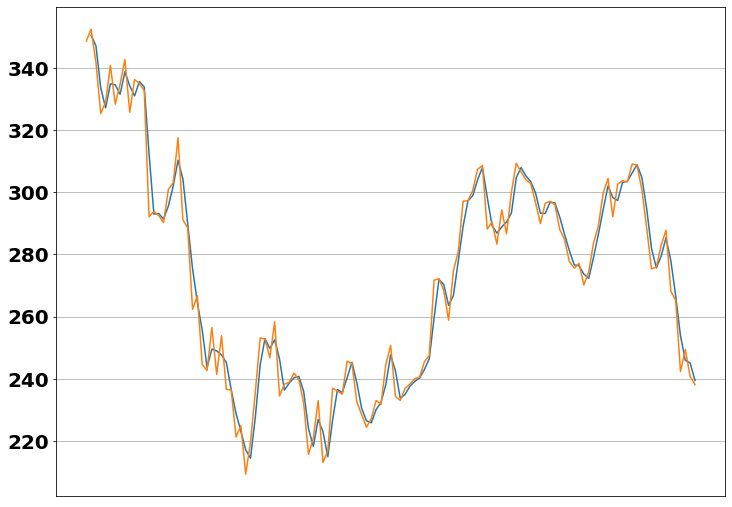

In [40]:
plt.figure(figsize = (12,9));
plt.figure(1);
df_TSLA_mean = pd.Series(df_TSLA['Close']).rolling(window=2).mean()
df_TSLA_mean
plt.plot(df_TSLA['Date'],df_TSLA_mean,df_TSLA['Date'],df_TSLA['Close']); plt.grid();
frame1 = plt.gca();
frame1.axes.get_xaxis().set_visible(False)

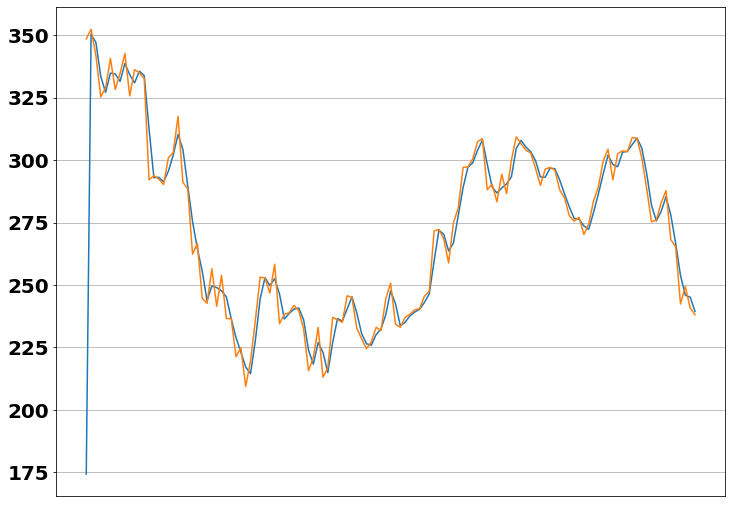

In [45]:
kernel_size = 2
kernel = np.ones(kernel_size) / kernel_size


TSLA_conv = np.convolve(df_TSLA['Close'], kernel, mode = 'same');
plt.figure(figsize = (12,9));
plt.figure(1);
plt.plot(df_TSLA['Date'],TSLA_conv,df_TSLA['Date'],df_TSLA['Close']); plt.grid();
frame1 = plt.gca();
frame1.axes.get_xaxis().set_visible(False)

In [49]:
df_TSLA_conv = pd.DataFrame(TSLA_conv)
df_TSLA_conv


,0
0,174.293335
1,350.503342
2,347.125000
3,333.569993
4,327.146668
...,...
122,266.729995
123,253.824997
124,245.919998
125,245.125000
